In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

from sklearn.tree import DecisionTreeClassifier

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('african_conflicts.csv', encoding='latin-1')

In [3]:
df.shape

(165808, 28)

In [4]:
df.head()

,ACTOR1,ACTOR1_ID,ACTOR2,ACTOR2_ID,ACTOR_DYAD_ID,ADMIN1,ADMIN2,ADMIN3,ALLY_ACTOR_1,ALLY_ACTOR_2,...,INTER1,INTER2,INTERACTION,LATITUDE,LOCATION,LONGITUDE,NOTES,SOURCE,TIME_PRECISION,YEAR
0,Police Forces of Algeria (1999-),NaN,Civilians (Algeria),NaN,NaN,Tizi Ouzou,Beni-Douala,NaN,NaN,Berber Ethnic Group (Algeria),...,1,7,17,36.61954,Beni Douala,4.08282,A Berber student was shot while in police cust...,Associated Press Online,1,2001
1,Rioters (Algeria),NaN,Police Forces of Algeria (1999-),NaN,NaN,Tizi Ouzou,Tizi Ouzou,NaN,Berber Ethnic Group (Algeria),NaN,...,5,1,15,36.71183,Tizi Ouzou,4.04591,Riots were reported in numerous villages in Ka...,Kabylie report,1,2001
2,Protesters (Algeria),NaN,NaN,NaN,NaN,Bejaia,Amizour,NaN,Students (Algeria),NaN,...,6,0,60,36.64022,Amizour,4.90131,Students protested in the Amizour area. At lea...,Crisis Group,1,2001
3,Rioters (Algeria),NaN,Police Forces of Algeria (1999-),NaN,NaN,Bejaia,Amizour,NaN,Berber Ethnic Group (Algeria),NaN,...,5,1,15,36.64022,Amizour,4.90131,"Rioters threw molotov cocktails, rocks and bur...",Kabylie report,1,2001
4,Rioters (Algeria),NaN,Police Forces of Algeria (1999-),NaN,NaN,Tizi Ouzou,Beni-Douala,NaN,Berber Ethnic Group (Algeria),NaN,...,5,1,15,36.61954,Beni Douala,4.08282,"Rioters threw molotov cocktails, rocks and bur...",Kabylie report,1,2001


In [5]:
df.columns

Index(['ACTOR1', 'ACTOR1_ID', 'ACTOR2', 'ACTOR2_ID', 'ACTOR_DYAD_ID', 'ADMIN1',
       'ADMIN2', 'ADMIN3', 'ALLY_ACTOR_1', 'ALLY_ACTOR_2', 'COUNTRY',
       'EVENT_DATE', 'EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_TYPE',
       'FATALITIES', 'GEO_PRECISION', 'GWNO', 'INTER1', 'INTER2',
       'INTERACTION', 'LATITUDE', 'LOCATION', 'LONGITUDE', 'NOTES', 'SOURCE',
       'TIME_PRECISION', 'YEAR'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165808 entries, 0 to 165807
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ACTOR1            165808 non-null  object 
 1   ACTOR1_ID         140747 non-null  float64
 2   ACTOR2            122255 non-null  object 
 3   ACTOR2_ID         140747 non-null  float64
 4   ACTOR_DYAD_ID     140747 non-null  object 
 5   ADMIN1            165808 non-null  object 
 6   ADMIN2            165676 non-null  object 
 7   ADMIN3            86933 non-null   object 
 8   ALLY_ACTOR_1      28144 non-null   object 
 9   ALLY_ACTOR_2      19651 non-null   object 
 10  COUNTRY           165808 non-null  object 
 11  EVENT_DATE        165808 non-null  object 
 12  EVENT_ID_CNTY     165808 non-null  object 
 13  EVENT_ID_NO_CNTY  140747 non-null  float64
 14  EVENT_TYPE        165808 non-null  object 
 15  FATALITIES        165808 non-null  int64  
 16  GEO_PRECISION     16

In [7]:
data_info = pd.DataFrame({
    'unique': df.nunique(),
    'precentage unique': df.nunique() / len(df) * 100,
    'null': df.isnull().sum(),
    'precentage null': df.isnull().sum() / len(df) * 100,
    'skew': round(df.skew(), 2)
})

In [8]:
data_info

,unique,precentage unique,null,precentage null,skew
ACTOR1,3288,1.983017,0,0.000000,NaN
ACTOR1_ID,3032,1.828621,25061,15.114470,-0.92
ACTOR2,2827,1.704984,43553,26.267128,NaN
ACTOR2_ID,2558,1.542748,25061,15.114470,0.79
ACTOR_DYAD_ID,9520,5.741581,25061,15.114470,NaN
ADMIN1,735,0.443284,0,0.000000,NaN
ADMIN2,4085,2.463693,132,0.079610,NaN
ADMIN3,4795,2.891899,78875,47.570081,NaN
ALLY_ACTOR_1,3272,1.973367,137664,83.026151,NaN
ALLY_ACTOR_2,2759,1.663973,146157,88.148340,NaN


In [9]:
df['EVENT_ID_CNTY'].head()

0    1416RTA
1    2229RTA
2    2230RTA
3    2231RTA
4    2232RTA
Name: EVENT_ID_CNTY, dtype: object

In [10]:
df['EVENT_ID_NO_CNTY'].unique()

array([        nan, 1.60000e+01, 3.90000e+01, ..., 1.37135e+05,
       1.37136e+05, 1.39875e+05])

In [11]:
df['SOURCE'].head()

0    Associated Press Online
1             Kabylie report
2               Crisis Group
3             Kabylie report
4             Kabylie report
Name: SOURCE, dtype: object

In [12]:
df['GEO_PRECISION'].head()

0    1
1    3
2    1
3    1
4    1
Name: GEO_PRECISION, dtype: int64

In [13]:
df.drop(columns=['ALLY_ACTOR_1',
                'ALLY_ACTOR_2',
                'NOTES',
                'EVENT_ID_CNTY',
                'EVENT_ID_NO_CNTY',
                'SOURCE',
                'ACTOR1_ID',
                'ACTOR2_ID'], inplace=True)

In [14]:
df.shape

(165808, 20)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165808 entries, 0 to 165807
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ACTOR1          165808 non-null  object
 1   ACTOR2          122255 non-null  object
 2   ACTOR_DYAD_ID   140747 non-null  object
 3   ADMIN1          165808 non-null  object
 4   ADMIN2          165676 non-null  object
 5   ADMIN3          86933 non-null   object
 6   COUNTRY         165808 non-null  object
 7   EVENT_DATE      165808 non-null  object
 8   EVENT_TYPE      165808 non-null  object
 9   FATALITIES      165808 non-null  int64 
 10  GEO_PRECISION   165808 non-null  int64 
 11  GWNO            165808 non-null  int64 
 12  INTER1          165808 non-null  int64 
 13  INTER2          165808 non-null  int64 
 14  INTERACTION     165808 non-null  int64 
 15  LATITUDE        165808 non-null  object
 16  LOCATION        165805 non-null  object
 17  LONGITUDE       165808 non-nu

In [16]:
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165808 entries, 0 to 165807
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ACTOR1          165808 non-null  object 
 1   ACTOR2          122255 non-null  object 
 2   ACTOR_DYAD_ID   140747 non-null  object 
 3   ADMIN1          165808 non-null  object 
 4   ADMIN2          165676 non-null  object 
 5   ADMIN3          86933 non-null   object 
 6   COUNTRY         165808 non-null  object 
 7   EVENT_DATE      165808 non-null  object 
 8   EVENT_TYPE      165808 non-null  object 
 9   FATALITIES      165808 non-null  int64  
 10  GEO_PRECISION   165808 non-null  int64  
 11  GWNO            165808 non-null  int64  
 12  INTER1          165808 non-null  int64  
 13  INTER2          165808 non-null  int64  
 14  INTERACTION     165808 non-null  int64  
 15  LATITUDE        165806 non-null  float64
 16  LOCATION        165805 non-null  object 
 17  LONGITUDE 

In [18]:
df.head()

,ACTOR1,ACTOR2,ACTOR_DYAD_ID,ADMIN1,ADMIN2,ADMIN3,COUNTRY,EVENT_DATE,EVENT_TYPE,FATALITIES,GEO_PRECISION,GWNO,INTER1,INTER2,INTERACTION,LATITUDE,LOCATION,LONGITUDE,TIME_PRECISION,YEAR
0,Police Forces of Algeria (1999-),Civilians (Algeria),NaN,Tizi Ouzou,Beni-Douala,NaN,Algeria,18/04/2001,Violence against civilians,1,1,615,1,7,17,36.61954,Beni Douala,4.08282,1,2001
1,Rioters (Algeria),Police Forces of Algeria (1999-),NaN,Tizi Ouzou,Tizi Ouzou,NaN,Algeria,19/04/2001,Riots/Protests,0,3,615,5,1,15,36.71183,Tizi Ouzou,4.04591,1,2001
2,Protesters (Algeria),NaN,NaN,Bejaia,Amizour,NaN,Algeria,20/04/2001,Riots/Protests,0,1,615,6,0,60,36.64022,Amizour,4.90131,1,2001
3,Rioters (Algeria),Police Forces of Algeria (1999-),NaN,Bejaia,Amizour,NaN,Algeria,21/04/2001,Riots/Protests,0,1,615,5,1,15,36.64022,Amizour,4.90131,1,2001
4,Rioters (Algeria),Police Forces of Algeria (1999-),NaN,Tizi Ouzou,Beni-Douala,NaN,Algeria,21/04/2001,Riots/Protests,0,1,615,5,1,15,36.61954,Beni Douala,4.08282,1,2001


In [19]:
df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165808 entries, 0 to 165807
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ACTOR1          165808 non-null  object        
 1   ACTOR2          122255 non-null  object        
 2   ACTOR_DYAD_ID   140747 non-null  object        
 3   ADMIN1          165808 non-null  object        
 4   ADMIN2          165676 non-null  object        
 5   ADMIN3          86933 non-null   object        
 6   COUNTRY         165808 non-null  object        
 7   EVENT_DATE      165808 non-null  datetime64[ns]
 8   EVENT_TYPE      165808 non-null  object        
 9   FATALITIES      165808 non-null  int64         
 10  GEO_PRECISION   165808 non-null  int64         
 11  GWNO            165808 non-null  int64         
 12  INTER1          165808 non-null  int64         
 13  INTER2          165808 non-null  int64         
 14  INTERACTION     165808 non-null  int

In [21]:
df.head()

,ACTOR1,ACTOR2,ACTOR_DYAD_ID,ADMIN1,ADMIN2,ADMIN3,COUNTRY,EVENT_DATE,EVENT_TYPE,FATALITIES,GEO_PRECISION,GWNO,INTER1,INTER2,INTERACTION,LATITUDE,LOCATION,LONGITUDE,TIME_PRECISION,YEAR
0,Police Forces of Algeria (1999-),Civilians (Algeria),NaN,Tizi Ouzou,Beni-Douala,NaN,Algeria,2001-04-18,Violence against civilians,1,1,615,1,7,17,36.61954,Beni Douala,4.08282,1,2001
1,Rioters (Algeria),Police Forces of Algeria (1999-),NaN,Tizi Ouzou,Tizi Ouzou,NaN,Algeria,2001-04-19,Riots/Protests,0,3,615,5,1,15,36.71183,Tizi Ouzou,4.04591,1,2001
2,Protesters (Algeria),NaN,NaN,Bejaia,Amizour,NaN,Algeria,2001-04-20,Riots/Protests,0,1,615,6,0,60,36.64022,Amizour,4.90131,1,2001
3,Rioters (Algeria),Police Forces of Algeria (1999-),NaN,Bejaia,Amizour,NaN,Algeria,2001-04-21,Riots/Protests,0,1,615,5,1,15,36.64022,Amizour,4.90131,1,2001
4,Rioters (Algeria),Police Forces of Algeria (1999-),NaN,Tizi Ouzou,Beni-Douala,NaN,Algeria,2001-04-21,Riots/Protests,0,1,615,5,1,15,36.61954,Beni Douala,4.08282,1,2001


In [22]:
df['month'] = df['EVENT_DATE'].dt.month
df['day'] = df['EVENT_DATE'].dt.day

In [23]:
df.drop(columns=['EVENT_DATE'], inplace=True)

In [24]:
df.head()

,ACTOR1,ACTOR2,ACTOR_DYAD_ID,ADMIN1,ADMIN2,ADMIN3,COUNTRY,EVENT_TYPE,FATALITIES,GEO_PRECISION,...,INTER1,INTER2,INTERACTION,LATITUDE,LOCATION,LONGITUDE,TIME_PRECISION,YEAR,month,day
0,Police Forces of Algeria (1999-),Civilians (Algeria),NaN,Tizi Ouzou,Beni-Douala,NaN,Algeria,Violence against civilians,1,1,...,1,7,17,36.61954,Beni Douala,4.08282,1,2001,4,18
1,Rioters (Algeria),Police Forces of Algeria (1999-),NaN,Tizi Ouzou,Tizi Ouzou,NaN,Algeria,Riots/Protests,0,3,...,5,1,15,36.71183,Tizi Ouzou,4.04591,1,2001,4,19
2,Protesters (Algeria),NaN,NaN,Bejaia,Amizour,NaN,Algeria,Riots/Protests,0,1,...,6,0,60,36.64022,Amizour,4.90131,1,2001,4,20
3,Rioters (Algeria),Police Forces of Algeria (1999-),NaN,Bejaia,Amizour,NaN,Algeria,Riots/Protests,0,1,...,5,1,15,36.64022,Amizour,4.90131,1,2001,4,21
4,Rioters (Algeria),Police Forces of Algeria (1999-),NaN,Tizi Ouzou,Beni-Douala,NaN,Algeria,Riots/Protests,0,1,...,5,1,15,36.61954,Beni Douala,4.08282,1,2001,4,21


In [25]:
# Define categorization thresholds
mild_threshold = 10
violent_threshold = 100

def categorize_fatality(fatality):
    if fatality <= mild_threshold:
        return 'Mild'
    elif fatality <= violent_threshold:
        return 'Violent'
    else:
        return 'Very Violent'


In [26]:
df['fatality_category'] = df['FATALITIES'].apply(categorize_fatality)

In [27]:
df['fatality_category'].value_counts(normalize=True)

Mild            0.948109
Violent         0.047332
Very Violent    0.004559
Name: fatality_category, dtype: float64

In [28]:
df.drop(columns=['FATALITIES'], inplace = True)

In [29]:
df.shape

(165808, 21)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165808 entries, 0 to 165807
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ACTOR1             165808 non-null  object 
 1   ACTOR2             122255 non-null  object 
 2   ACTOR_DYAD_ID      140747 non-null  object 
 3   ADMIN1             165808 non-null  object 
 4   ADMIN2             165676 non-null  object 
 5   ADMIN3             86933 non-null   object 
 6   COUNTRY            165808 non-null  object 
 7   EVENT_TYPE         165808 non-null  object 
 8   GEO_PRECISION      165808 non-null  int64  
 9   GWNO               165808 non-null  int64  
 10  INTER1             165808 non-null  int64  
 11  INTER2             165808 non-null  int64  
 12  INTERACTION        165808 non-null  int64  
 13  LATITUDE           165806 non-null  float64
 14  LOCATION           165805 non-null  object 
 15  LONGITUDE          165797 non-null  float64
 16  TI

In [31]:
df.isnull().sum()

ACTOR1                   0
ACTOR2               43553
ACTOR_DYAD_ID        25061
ADMIN1                   0
ADMIN2                 132
ADMIN3               78875
COUNTRY                  0
EVENT_TYPE               0
GEO_PRECISION            0
GWNO                     0
INTER1                   0
INTER2                   0
INTERACTION              0
LATITUDE                 2
LOCATION                 3
LONGITUDE               11
TIME_PRECISION           0
YEAR                     0
month                    0
day                      0
fatality_category        0
dtype: int64

In [32]:
imputer = SimpleImputer(strategy='most_frequent')
columns_to_impute = ['LATITUDE', 'LONGITUDE', 'LOCATION']

# Fit and transform the imputer on the selected columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [33]:
df.isnull().sum()

ACTOR1                   0
ACTOR2               43553
ACTOR_DYAD_ID        25061
ADMIN1                   0
ADMIN2                 132
ADMIN3               78875
COUNTRY                  0
EVENT_TYPE               0
GEO_PRECISION            0
GWNO                     0
INTER1                   0
INTER2                   0
INTERACTION              0
LATITUDE                 0
LOCATION                 0
LONGITUDE                0
TIME_PRECISION           0
YEAR                     0
month                    0
day                      0
fatality_category        0
dtype: int64

In [34]:
label_encoder = LabelEncoder()
df['fatality_category'] = label_encoder.fit_transform(df['fatality_category'])

In [35]:
df['fatality_category'].value_counts()

0    157204
2      7848
1       756
Name: fatality_category, dtype: int64

In [36]:
X = df.drop(columns=['fatality_category'])
y = df['fatality_category']

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165808 entries, 0 to 165807
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ACTOR1          165808 non-null  object
 1   ACTOR2          122255 non-null  object
 2   ACTOR_DYAD_ID   140747 non-null  object
 3   ADMIN1          165808 non-null  object
 4   ADMIN2          165676 non-null  object
 5   ADMIN3          86933 non-null   object
 6   COUNTRY         165808 non-null  object
 7   EVENT_TYPE      165808 non-null  object
 8   GEO_PRECISION   165808 non-null  int64 
 9   GWNO            165808 non-null  int64 
 10  INTER1          165808 non-null  int64 
 11  INTER2          165808 non-null  int64 
 12  INTERACTION     165808 non-null  int64 
 13  LATITUDE        165808 non-null  object
 14  LOCATION        165808 non-null  object
 15  LONGITUDE       165808 non-null  object
 16  TIME_PRECISION  165808 non-null  int64 
 17  YEAR            165808 non-nu

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# def convert_columns_to_numeric(X_train, X_test, label_encoder=None):
#     if label_encoder is None:
#         label_encoder = LabelEncoder()

#     for col in X_train.columns:
#         if X_train[col].dtype == 'object':
#             try:
#                 X_train[col] = X_train[col].astype(str)
#                 X_test[col] = X_test[col].astype(str)
#                 label_encoder.fit(X_train[col])
#                 X_train[col] = label_encoder.transform(X_train[col])
#                 X_test[col] = label_encoder.transform(X_test[col])

#             except ValueError as e:
#                 if "unseen label" in str(e):
#                     X_train[col] = label_encoder.inverse_transform(X_train[col])
#                     combined_data = np.concatenate([X_train[col], X_test[col]])
#                     label_encoder.fit(combined_data)
#                     X_train[col] = label_encoder.transform(X_train[col])
#                     X_test[col] = label_encoder.transform(X_test[col])

#     return X_train, X_test, label_encoder

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_columns(X_train, X_test, label_encoder=None, scaler=None):
    if label_encoder is None:
        label_encoder = LabelEncoder()

    if scaler is None:
        scaler = StandardScaler()

    for col in X_train.columns:
        if X_train[col].dtype == 'object':
            try:
                X_train[col] = X_train[col].astype(str)
                X_test[col] = X_test[col].astype(str)
                label_encoder.fit(X_train[col])
                X_train[col] = label_encoder.transform(X_train[col])
                X_test[col] = label_encoder.transform(X_test[col])

            except ValueError as e:
                if "unseen label" in str(e):
                    X_train[col] = label_encoder.inverse_transform(X_train[col])
                    combined_data = np.concatenate([X_train[col], X_test[col]])
                    label_encoder.fit(combined_data)
                    X_train[col] = label_encoder.transform(X_train[col])
                    X_test[col] = label_encoder.transform(X_test[col])
        
        elif X_train[col].dtype == 'float64' or X_train[col].dtype == 'int64':
            try:
                X_train[col] = X_train[col].astype(float)
                X_test[col] = X_test[col].astype(float)
                scaler.fit(X_train[col].values.reshape(-1, 1))
                X_train[col] = scaler.transform(X_train[col].values.reshape(-1, 1))
                X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))
            except ValueError as e:
                print(f"Error processing column {col}: {str(e)}")

    return X_train, X_test, label_encoder, scaler


In [41]:
# Assume X_train and X_test are your dataframes

# Preprocess columns and apply label encoding and standardization
X_train_processed, X_test_processed, label_encoder, scaler = preprocess_columns(X_train, X_test)

# Now you can proceed with your modeling steps using the preprocessed data


In [43]:
# X_train, X_test, label_encoder= convert_columns_to_numeric(X_train, X_test)

In [44]:
joblib.dump(label_encoder, "label_encoder.joblib")

['label_encoder.joblib']

In [45]:
X_train.head()

,ACTOR1,ACTOR2,ACTOR_DYAD_ID,ADMIN1,ADMIN2,ADMIN3,COUNTRY,EVENT_TYPE,GEO_PRECISION,GWNO,INTER1,INTER2,INTERACTION,LATITUDE,LOCATION,LONGITUDE,TIME_PRECISION,YEAR,month,day
97567,2583,2827,553,205,32,4788,34,8,-0.498079,-1.020455,1.287249,-1.094943,1.534722,17741,168,17639,-0.315738,-0.130173,0.506851,1.099935
154609,3111,484,8832,355,2179,205,47,13,1.413283,-0.617458,-0.188579,1.301663,0.275101,6473,8016,12583,-0.315738,-1.655132,1.378813,-1.406434
25997,63,1384,7950,104,3791,4788,0,1,-0.498079,1.236328,-0.680522,-0.752571,-1.094052,13690,16419,9719,-0.315738,-0.130173,0.506851,-1.292508
14638,161,451,9520,358,2734,1386,21,13,-0.498079,-0.601338,-0.680522,1.301663,-0.272560,5160,11417,13879,-0.315738,0.886466,-0.365111,-0.950730
25193,826,1979,1068,679,3815,4788,0,1,-0.498079,1.236328,-0.680522,-0.752571,-1.094052,13023,16519,2302,-0.315738,-1.824572,0.216197,-1.520359


In [46]:
X_test.head()

,ACTOR1,ACTOR2,ACTOR_DYAD_ID,ADMIN1,ADMIN2,ADMIN3,COUNTRY,EVENT_TYPE,GEO_PRECISION,GWNO,INTER1,INTER2,INTERACTION,LATITUDE,LOCATION,LONGITUDE,TIME_PRECISION,YEAR,month,day
108960,161,1541,2600,56,2674,4788,39,1,-0.498079,-0.295061,-0.680522,-0.752571,-1.094052,10247,6733,15708,-0.315738,0.039267,-0.365111,-0.381101
45189,1839,1570,3850,196,1272,466,9,7,-0.498079,-0.778657,2.271135,1.644036,3.068174,5831,2465,4704,-0.315738,-1.994011,-0.655765,-0.836804
103759,2635,2827,583,525,3837,2003,38,4,1.413283,-1.407332,-0.680522,-1.094943,-0.655923,17518,10504,728,4.200256,-2.332891,-0.074457,-0.039323
45803,3072,431,7076,57,2197,1729,9,13,-0.498079,-0.778657,-0.188579,1.301663,0.275101,5578,12745,4715,-0.315738,-1.316252,-0.655765,-0.608953
157483,350,246,6065,311,746,2616,47,1,1.413283,-0.617458,0.303363,0.274546,0.658464,5871,14909,9900,-0.315738,-0.469053,-0.946419,0.644232


In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132646 entries, 97567 to 121958
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ACTOR1          132646 non-null  int32  
 1   ACTOR2          132646 non-null  int32  
 2   ACTOR_DYAD_ID   132646 non-null  int32  
 3   ADMIN1          132646 non-null  int32  
 4   ADMIN2          132646 non-null  int32  
 5   ADMIN3          132646 non-null  int32  
 6   COUNTRY         132646 non-null  int32  
 7   EVENT_TYPE      132646 non-null  int32  
 8   GEO_PRECISION   132646 non-null  float64
 9   GWNO            132646 non-null  float64
 10  INTER1          132646 non-null  float64
 11  INTER2          132646 non-null  float64
 12  INTERACTION     132646 non-null  float64
 13  LATITUDE        132646 non-null  int32  
 14  LOCATION        132646 non-null  int32  
 15  LONGITUDE       132646 non-null  int32  
 16  TIME_PRECISION  132646 non-null  float64
 17  YEAR  

In [67]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

In [68]:
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [50]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

In [51]:
X_train.shape

(132646, 20)

In [52]:
y_train.value_counts(normalize=True)

0    0.948163
2    0.047223
1    0.004614
Name: fatality_category, dtype: float64

In [53]:
y_test.value_counts(normalize=True)

0    0.947892
2    0.047766
1    0.004342
Name: fatality_category, dtype: float64

In [54]:
print("Original class distribution:", pd.Series(y_train).value_counts())
print("Resampled class distribution:", pd.Series(y_smote).value_counts())

Original class distribution: 0    125770
2      6264
1       612
Name: fatality_category, dtype: int64
Resampled class distribution: 0    125770
2    125770
1    125770
Name: fatality_category, dtype: int64


In [55]:
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [56]:
y_pred = clf.predict(X_test)

# Calculate accuracy
print("Accuracy for test:", accuracy_score(y_test, y_pred))

Accuracy for test: 0.7918400578975936


In [57]:
print('Accuracy for train:', accuracy_score(y_train, clf.predict(X_train)))

Accuracy for train: 0.7930355985103207


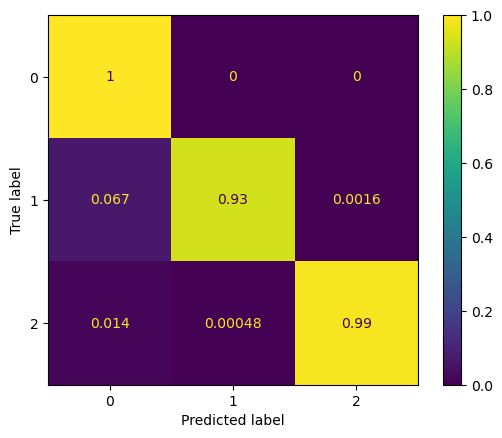

In [58]:
ConfusionMatrixDisplay.from_estimator(clf,X_train_scaled, y_train, normalize='true')

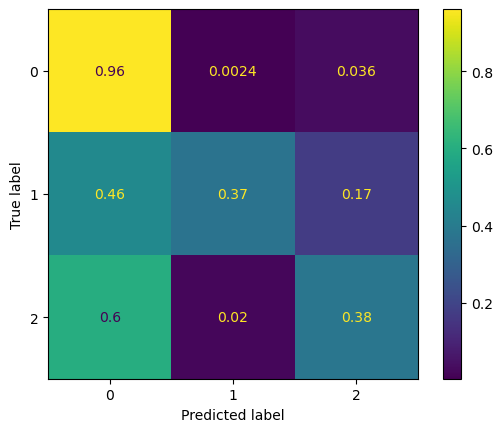

In [59]:
ConfusionMatrixDisplay.from_estimator(clf,X_test_scaled, y_test, normalize='true')

In [60]:
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_smote, y_smote)

DecisionTreeClassifier(random_state=42)

In [61]:
y_pred = model.predict(X_test)

# Calculate accuracy
print("Accuracy for test:", accuracy_score(y_test, y_pred))

Accuracy for test: 0.7634340510222544


In [62]:
print('Accuracy for train', accuracy_score(y_train, model.predict(X_train)))

Accuracy for train 0.7603621669707341


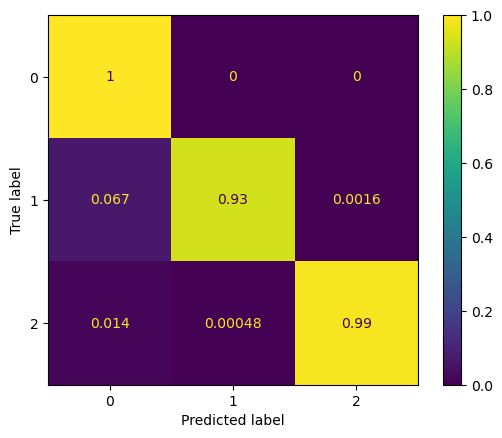

In [63]:
ConfusionMatrixDisplay.from_estimator(model,X_train_scaled, y_train, normalize='true')

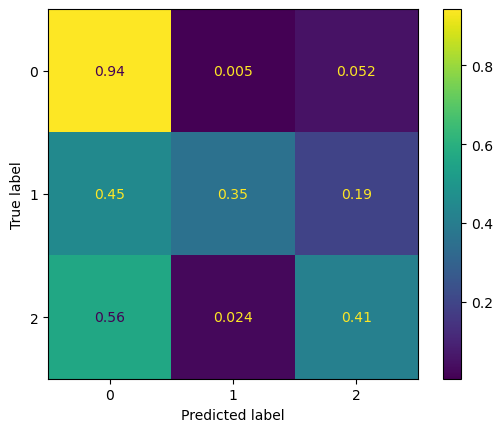

In [64]:
ConfusionMatrixDisplay.from_estimator(model,X_test_scaled, y_test, normalize='true')

In [65]:
joblib.dump(model, "model.joblib")

['model.joblib']

In [66]:
X.head()

,ACTOR1,ACTOR2,ACTOR_DYAD_ID,ADMIN1,ADMIN2,ADMIN3,COUNTRY,EVENT_TYPE,GEO_PRECISION,GWNO,INTER1,INTER2,INTERACTION,LATITUDE,LOCATION,LONGITUDE,TIME_PRECISION,YEAR,month,day
0,Police Forces of Algeria (1999-),Civilians (Algeria),NaN,Tizi Ouzou,Beni-Douala,NaN,Algeria,Violence against civilians,1,615,1,7,17,36.61954,Beni Douala,4.08282,1,2001,4,18
1,Rioters (Algeria),Police Forces of Algeria (1999-),NaN,Tizi Ouzou,Tizi Ouzou,NaN,Algeria,Riots/Protests,3,615,5,1,15,36.71183,Tizi Ouzou,4.04591,1,2001,4,19
2,Protesters (Algeria),NaN,NaN,Bejaia,Amizour,NaN,Algeria,Riots/Protests,1,615,6,0,60,36.64022,Amizour,4.90131,1,2001,4,20
3,Rioters (Algeria),Police Forces of Algeria (1999-),NaN,Bejaia,Amizour,NaN,Algeria,Riots/Protests,1,615,5,1,15,36.64022,Amizour,4.90131,1,2001,4,21
4,Rioters (Algeria),Police Forces of Algeria (1999-),NaN,Tizi Ouzou,Beni-Douala,NaN,Algeria,Riots/Protests,1,615,5,1,15,36.61954,Beni Douala,4.08282,1,2001,4,21
